In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/en-core-web-sm-zip/en_core_web_sm/meta.json
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/__init__.py
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/tokenizer
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/meta.json
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/accuracy.json
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/config.cfg
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/attribute_ruler/patterns
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/vocab/vectors
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/vocab/key2row
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/vocab/strings.json
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/vocab/lookups.bin
/kaggle/input/en-core-web-sm-zip/en_core_web_sm/en_core_web_sm-3.0.0/parser/model
/kaggle/input/en-core-web-sm-zip/en_core_web

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
recipes_df = pd.read_csv("/kaggle/input/6000-indian-food-recipes-dataset/IndianFoodDatasetCSV.csv")

In [5]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Srno                    6871 non-null   int64 
 1   RecipeName              6871 non-null   object
 2   TranslatedRecipeName    6871 non-null   object
 3   Ingredients             6865 non-null   object
 4   TranslatedIngredients   6865 non-null   object
 5   PrepTimeInMins          6871 non-null   int64 
 6   CookTimeInMins          6871 non-null   int64 
 7   TotalTimeInMins         6871 non-null   int64 
 8   Servings                6871 non-null   int64 
 9   Cuisine                 6871 non-null   object
 10  Course                  6871 non-null   object
 11  Diet                    6871 non-null   object
 12  Instructions            6871 non-null   object
 13  TranslatedInstructions  6871 non-null   object
 14  URL                     6871 non-null   object
dtypes: i

In [6]:
recipes_df.describe()

,Srno,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000
mean,4902.979042,28.585213,30.832339,59.417552,5.611410
std,3479.531022,81.042007,34.019694,88.699940,26.221807
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1955.500000,10.000000,20.000000,30.000000,4.000000
50%,4304.000000,15.000000,30.000000,40.000000,4.000000
75%,7363.000000,20.000000,35.000000,55.000000,4.000000
max,14211.000000,2880.000000,900.000000,2925.000000,1000.000000


In [7]:
recipes_df.Cuisine.unique()

array(['Indian', 'South Indian Recipes', 'Andhra', 'Udupi', 'Mexican',
       'Fusion', 'Continental', 'Bengali Recipes', 'Punjabi', 'Chettinad',
       'Tamil Nadu', 'Maharashtrian Recipes', 'North Indian Recipes',
       'Italian Recipes', 'Sindhi', 'Thai', 'Chinese', 'Kerala Recipes',
       'Gujarati Recipes\ufeff', 'Coorg', 'Rajasthani', 'Asian',
       'Middle Eastern', 'Coastal Karnataka', 'European', 'Kashmiri',
       'Karnataka', 'Lucknowi', 'Hyderabadi', 'Side Dish', 'Goan Recipes',
       'Arab', 'Assamese', 'Bihari', 'Malabar', 'Himachal', 'Awadhi',
       'Cantonese', 'North East India Recipes', 'Sichuan', 'Mughlai',
       'Japanese', 'Mangalorean', 'Vietnamese', 'British',
       'North Karnataka', 'Parsi Recipes', 'Greek', 'Nepalese',
       'Oriya Recipes', 'French', 'Indo Chinese', 'Konkan',
       'Mediterranean', 'Sri Lankan', 'Haryana', 'Uttar Pradesh',
       'Malvani', 'Indonesian', 'African', 'Shandong', 'Korean',
       'American', 'Kongunadu', 'Pakistani', 'C

In [8]:
recipes_df.Diet.unique()

array(['Diabetic Friendly', 'Vegetarian', 'High Protein Vegetarian',
       'Non Vegeterian', 'High Protein Non Vegetarian', 'Eggetarian',
       'Vegan', 'No Onion No Garlic (Sattvic)', 'Gluten Free',
       'Sugar Free Diet'], dtype=object)

In [9]:
recipes_df.replace("Non Vegeterian","Non Vegetarian",inplace=True)

In [10]:
recipes_df.Course.unique()

array(['Side Dish', 'Main Course', 'South Indian Breakfast', 'Lunch',
       'Snack', 'High Protein Vegetarian', 'Dinner', 'Appetizer',
       'Indian Breakfast', 'Dessert', 'North Indian Breakfast',
       'One Pot Dish', 'World Breakfast', 'Non Vegetarian', 'Vegetarian',
       'Eggetarian', 'No Onion No Garlic (Sattvic)', 'Brunch', 'Vegan',
       'Sugar Free Diet'], dtype=object)

## 1. Average cooking time per cusine?

In [11]:
_df = recipes_df.groupby(by='Cuisine').aggregate('mean').sort_values(by='TotalTimeInMins',ascending=False).reset_index()

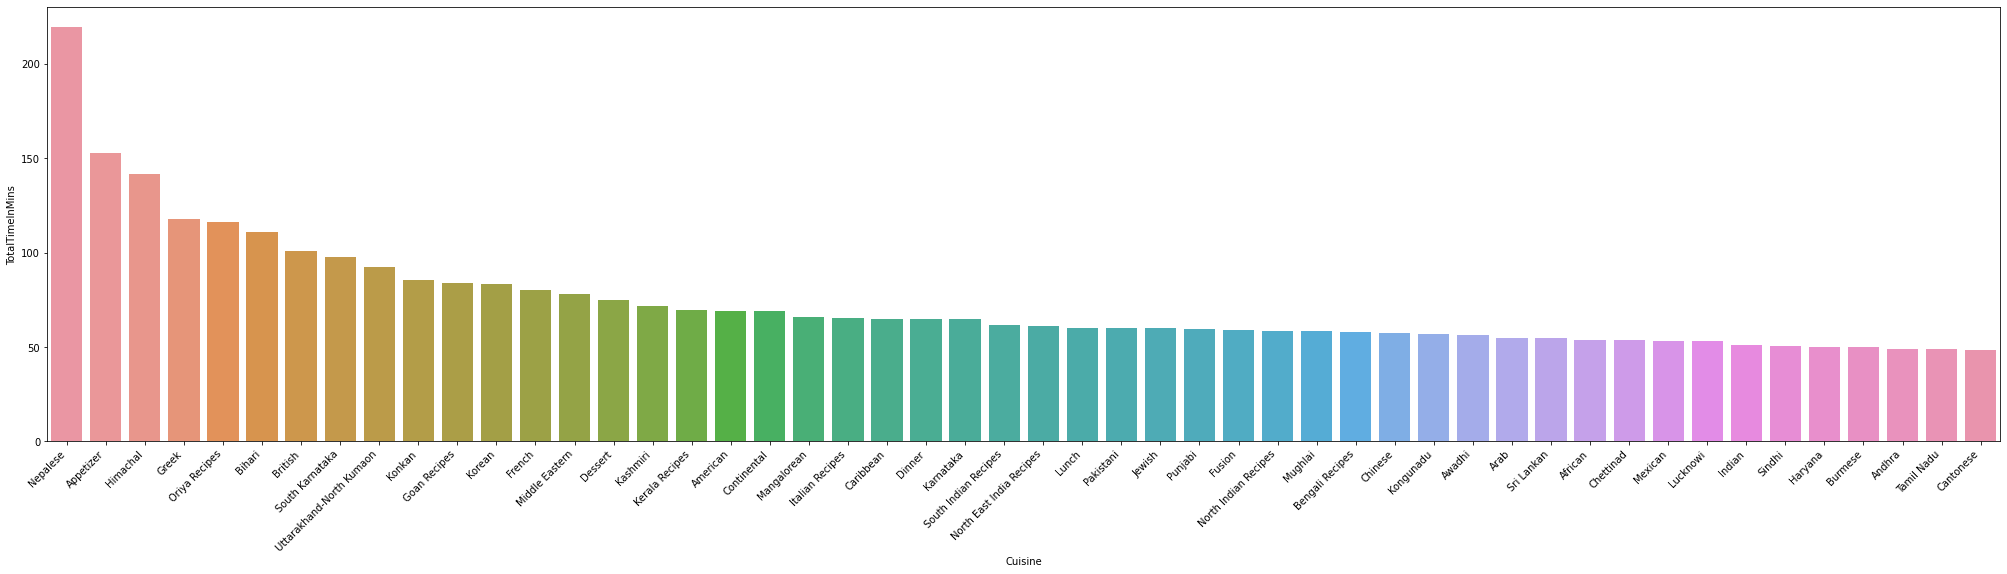

In [12]:
plt.figure(figsize=(35,8))
barplt = sns.barplot(data=_df.head(50),x='Cuisine',y='TotalTimeInMins')
barplt.set_xticklabels(barplt.get_xticklabels(),rotation=45,horizontalalignment='right')
None

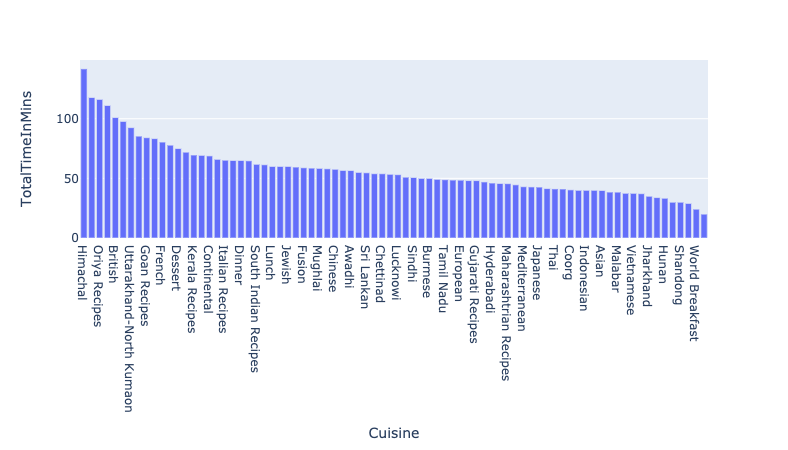

In [13]:
px.bar(data_frame=_df.tail(80),x='Cuisine',y='TotalTimeInMins')

## 2. Various diets and number of recipes per diet?

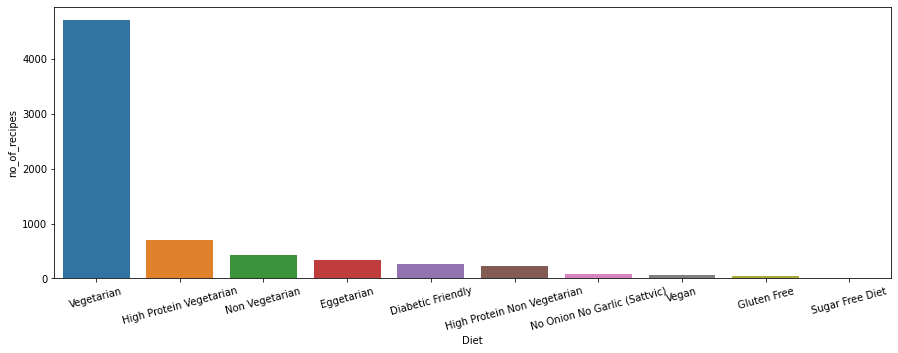

In [14]:
plt.figure(figsize=(15,5))
_df = recipes_df.groupby("Diet")['Srno'].count().rename('no_of_recipes').reset_index()
barplt = sns.barplot(data=_df.sort_values(by='no_of_recipes',ascending=False),x='Diet',y='no_of_recipes')
barplt.set_xticklabels(barplt.get_xticklabels(),rotation=15,horizontalalignment='center')
None

## 3. Which Cuisine has most & least Vegetarian dishes ? 
**(Provided there are atleast 10 recipes from that cuisine in the dataset)**

In [15]:
'''
veg_diet = ["Vegetarian","No Onion No Garlic (Sattvic)","High Protein Vegetarian","Vegan"]
_df = recipes_df.groupby(['Cuisine','Diet']).count()['Srno'].rename("no_of_recipes").reset_index()
_df["tot_recipes_Cuisine"] = _df.apply(lambda x:_df[_df.Cuisine == x.Cuisine].no_of_recipes.sum(),axis=1)
def cal_per(x):
    if (x.tot_recipes_Cuisine.unique()[0] > 10):
        return x.no_of_recipes.sum()/x.tot_recipes_Cuisine.unique()[0] 
_df_per_veg = _df[_df.Diet.isin(veg_diet)].groupby("Cuisine").\
        apply(lambda x:cal_per(x)).rename("percent_vegetarian").reset_index()
_df_per_nonveg = _df[~_df.Diet.isin(veg_diet)].groupby("Cuisine").\
        apply(lambda x:cal_per(x)).rename("percent_non_vegetarian").reset_index()
plt.figure(figsize=(25,5))
fig,axs = plt.subplots(2,1,figsize=(15,10))
sns.barplot(data=_df_per_veg.sort_values(by='percent_vegetarian',ascending=False).\
                     head(30),x='Cuisine',y='percent_vegetarian',ax=axs[0])
sns.barplot(data=_df_per_nonveg.sort_values(by='percent_non_vegetarian',ascending=False).\
                     head(30),x='Cuisine',y='percent_non_vegetarian',ax=axs[1])
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='center')
None
'''

'\nveg_diet = ["Vegetarian","No Onion No Garlic (Sattvic)","High Protein Vegetarian","Vegan"]\n_df = recipes_df.groupby([\'Cuisine\',\'Diet\']).count()[\'Srno\'].rename("no_of_recipes").reset_index()\n_df["tot_recipes_Cuisine"] = _df.apply(lambda x:_df[_df.Cuisine == x.Cuisine].no_of_recipes.sum(),axis=1)\ndef cal_per(x):\n    if (x.tot_recipes_Cuisine.unique()[0] > 10):\n        return x.no_of_recipes.sum()/x.tot_recipes_Cuisine.unique()[0] \n_df_per_veg = _df[_df.Diet.isin(veg_diet)].groupby("Cuisine").        apply(lambda x:cal_per(x)).rename("percent_vegetarian").reset_index()\n_df_per_nonveg = _df[~_df.Diet.isin(veg_diet)].groupby("Cuisine").        apply(lambda x:cal_per(x)).rename("percent_non_vegetarian").reset_index()\nplt.figure(figsize=(25,5))\nfig,axs = plt.subplots(2,1,figsize=(15,10))\nsns.barplot(data=_df_per_veg.sort_values(by=\'percent_vegetarian\',ascending=False).                     head(30),x=\'Cuisine\',y=\'percent_vegetarian\',ax=axs[0])\nsns.barplot(data=_df_per

In [16]:
veg_diet = ["Vegetarian","No Onion No Garlic (Sattvic)","High Protein Vegetarian","Vegan"]
_df_grp_cuisine = pd.DataFrame(index=recipes_df.groupby(['Cuisine']).count().index)
_df_grp_cuisine['total_veg'] = recipes_df[recipes_df.Diet.isin(veg_diet)].groupby(['Cuisine']).count()[['Srno']]
_df_grp_cuisine['total_non_veg'] = recipes_df[~recipes_df.Diet.isin(veg_diet)].groupby(['Cuisine']).count()[['Srno']]
_df_grp_cuisine['total'] = _df_grp_cuisine[['total_veg','total_non_veg']].sum(axis=1)
_df_grp_cuisine['per_veg'] = _df_grp_cuisine['total_veg']/_df_grp_cuisine['total']
_df_grp_cuisine['per_non_veg'] = _df_grp_cuisine['total_non_veg']/_df_grp_cuisine['total']
_df_grp_cuisine.reset_index(inplace=True)

<Figure size 1800x360 with 0 Axes>

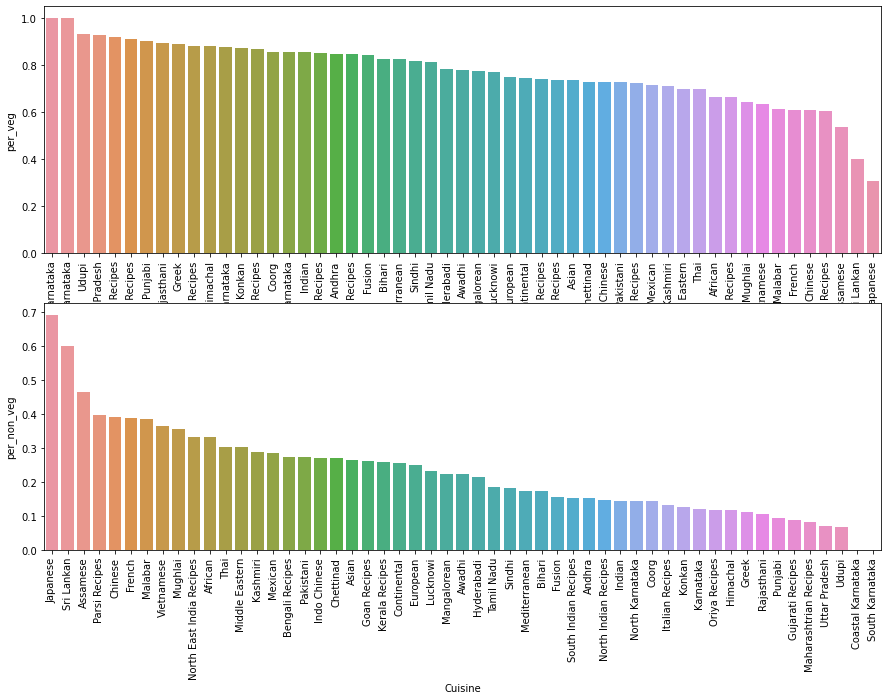

In [17]:
plt.figure(figsize=(25,5))
fig,axs = plt.subplots(2,1,figsize=(15,10))
sns.barplot(data=_df_grp_cuisine[_df_grp_cuisine.total>10].sort_values(by='per_veg',ascending=False)\
                ,x='Cuisine',y='per_veg',ax=axs[0])
sns.barplot(data=_df_grp_cuisine[_df_grp_cuisine.total>10].sort_values(by='per_non_veg',ascending=False)\
                     ,x='Cuisine',y='per_non_veg',ax=axs[1])
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='center')
None

## 4. Visualizing most prominent ingredients using a word cloud.

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [19]:
def check_word(word):
    if re.match('^[a-zA-Z]+$',word):
            return True
    return False

In [20]:
import wordcloud as wc

In [21]:
from nltk.tokenize import word_tokenize,sent_tokenize
import re

def create_ingredients_wordcloud(ingredients_df,color):
    ingredients_list = ingredients_df.to_list()
    ingredients_text = []
    for line in ingredients_list:
        if line==line:
            try:
                line = line.lower()
                line = word_tokenize(line)
                line = [word for word in line if check_word(word)]
                ingredients_text +=line
            except Exception as err:
                print(err)

    wordcloud = WordCloud(stopwords=stop_words,width = 800, height = 400,max_words=150, max_font_size=100,\
                          background_color ='white',color_func=wc.get_single_color_func(color),random_state=42,min_font_size = 8)\
                .generate(' '.join(ingredients_text))
    #background_color="white", contour_width=2, contour_color='orange',width=1500, \
    #height=750,color_func=color_wc,
    plt.figure(figsize = (16, 16), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

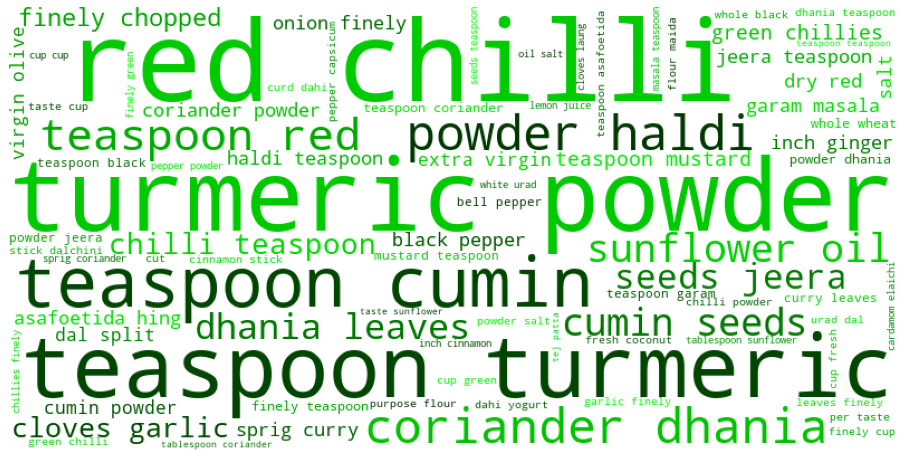

In [22]:
ingredients_df = recipes_df.TranslatedIngredients
create_ingredients_wordcloud(ingredients_df,'green')

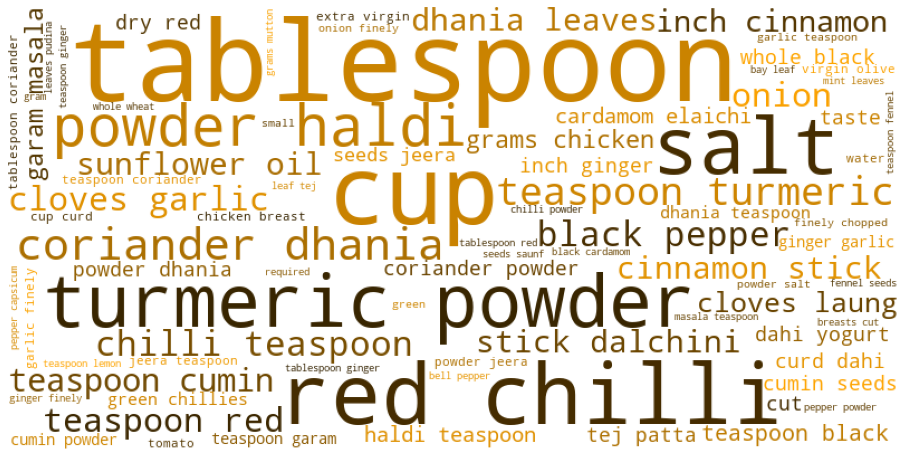

In [23]:
ingredients_df = recipes_df[recipes_df.Diet == 'Non Vegetarian'].TranslatedIngredients
create_ingredients_wordcloud(ingredients_df,'orange')

## 5. Is there a corelation between number of ingredients and cooking time?

In [24]:
def remove_unwanted(line):
    if line==line:
        line = line.lower()
        line = word_tokenize(line)
        line = [word for word in line if check_word(word)]
    else:
        line=""
    return line

In [25]:
recipes_df['no_of_ingredients'] = recipes_df.apply(lambda row : len(remove_unwanted(row['TranslatedIngredients'])),axis=1)

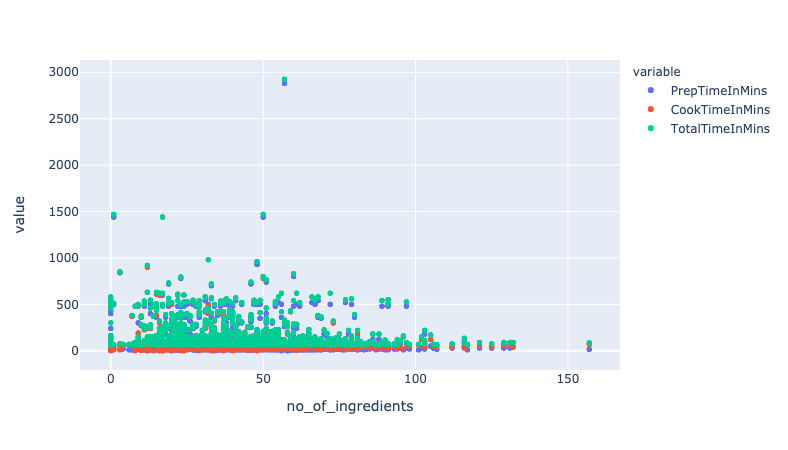

In [26]:
px.scatter(data_frame=recipes_df[recipes_df.TotalTimeInMins > 60],x='no_of_ingredients',y=['PrepTimeInMins','CookTimeInMins','TotalTimeInMins'],color_continuous_scale='agsunset')

**This doesn't give a good corelation . This is probably because of all the other words in the ingredients other than the nouns. We can extract only the nouns from the ingredient list with NER(Named entity recognition)**

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [28]:
def generate_nouns(line):
    nouns = ""
    if line==line:
        line = line.lower()
        line = word_tokenize(line)
        line = [word for word in line if check_word(word)]
        line_spacy = nlp(' '.join(line))
        nouns = [word for word in line_spacy if word.pos_ == 'NOUN']
    return nouns

In [31]:
recipes_df['ingredients_nouns'] = recipes_df.apply(lambda row : generate_nouns(row['TranslatedIngredients']),axis=1)

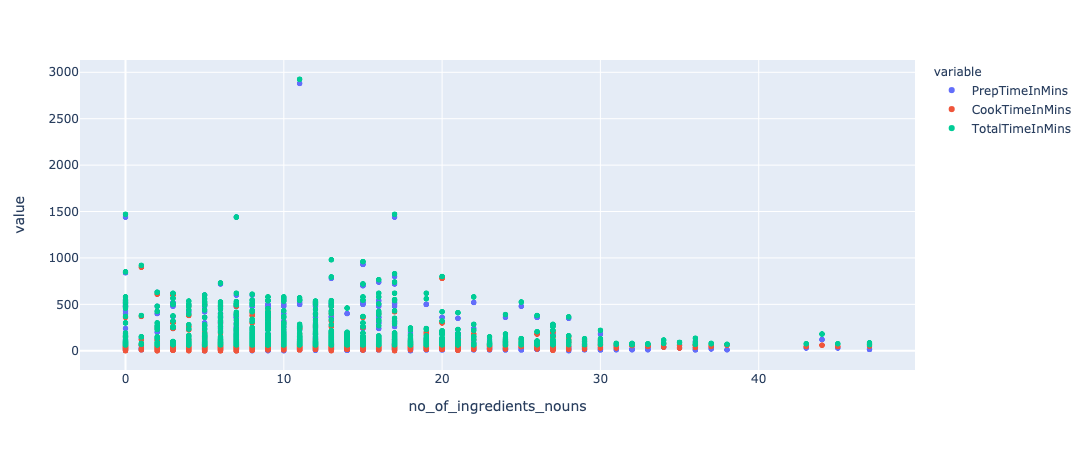

In [30]:
px.scatter(data_frame=recipes_df[recipes_df.TotalTimeInMins > 60],x='no_of_ingredients_nouns',y=['PrepTimeInMins','CookTimeInMins','TotalTimeInMins'],color_continuous_scale='agsunset')